# Steps

1. Build a graph <br>
2. Initiate a session <br>
3. Feed data in and get Output

### A graph of wx + b = z

( ( w, x => tf.matmul() ), b ) => tf.add() => Activation Function <br> <br>
w and b are variables <br> x is a placeholder

In [2]:
import numpy as np
import tensorflow as tf

In [2]:
np.random.seed(101)
tf.set_random_seed(101)

In [7]:
rand_a = np.random.uniform(0, 100, (5, 5))

In [8]:
rand_a

array([[ 34.36315779,  86.50998163,  83.02777122,  53.81614492,
         92.24693726],
       [  9.71464798,  10.28474932,  70.15072957,  89.04798691,
         15.95603009],
       [ 27.55725449,  67.24915297,  16.4303124 ,  70.13711366,
         48.76352222],
       [ 68.06777682,  52.15481923,   4.33966944,  22.39366035,
         57.52050869],
       [ 12.04336601,  50.01167138,  13.80095683,   5.28084011,
         17.82769225]])

In [9]:
rand_b = np.random.uniform(0, 100, (5, 1))

In [10]:
rand_b

array([[ 44.23681315],
       [ 87.75873246],
       [ 94.9264129 ],
       [ 47.81674168],
       [ 46.11193423]])

In [11]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [12]:
add_op = a + b

In [13]:
mul_op = a * b

In [18]:
with tf.Session() as sess:
    # feed_dict dict(placeholder: data to feed)
    add_result = sess.run(add_op, feed_dict = {a:10, b:20})
    
    mul_result = sess.run(mul_op, feed_dict = {a:rand_a, b:rand_b})

In [19]:
add_result

30.0

In [20]:
mul_result

array([[ 1520.11657715,  3826.92578125,  3672.8840332 ,  2380.65454102,
         4080.71069336],
       [  852.54522705,   902.57659912,  6156.33886719,  7814.73876953,
         1400.28100586],
       [ 2615.91137695,  6383.72119141,  1559.6706543 ,  6657.86474609,
         4628.94628906],
       [ 3254.77954102,  2493.87353516,   207.5088501 ,  1070.79187012,
         2750.44335938],
       [  555.34295654,  2306.13500977,   636.38879395,   243.50975037,
          822.06939697]], dtype=float32)

## Simple Neural Network

In [1]:
n_features = 10
n_dense_neurons = 3

In [3]:
x = tf.placeholder(tf.float32, (None, n_features))

In [12]:
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))

bias = tf.Variable(tf.ones([n_dense_neurons]))

In [13]:
xW = tf.matmul(x, W)

In [14]:
z = tf.add(xW, bias)

In [15]:
#activation function tf.tanh, tf.nn, tf.sigmoid
a = tf.sigmoid(z)

In [16]:
init = tf.global_variables_initializer()

In [17]:
with tf.Session() as sess:
    sess.run(init)
    result = sess.run(a, feed_dict = {x : np.random.random([1, n_features])})

In [18]:
result

array([[ 0.14676428,  0.89728177,  0.93777746]], dtype=float32)

## Simple Regression Example

In [19]:
# making random linear data
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10) # 10 linearly spaced points between 0 and 10 + add some noise

In [20]:
x_data

array([  1.19058194,   0.49992527,   3.16238335,   2.44019238,
         4.95070279,   5.02965414,   5.86828909,   7.29547218,
         8.79886318,  11.29366839])

In [22]:
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
plt.plot(x_data, y_label, "*")

### Now we have noisy data. Let's start on with NN

In [26]:
np.random.rand(2) # two random numbers

array([ 0.37249639,  0.18525149])

In [28]:
m = tf.Variable(0.37)
b = tf.Variable(0.18) # cost function should optimize these vals

In [29]:
error = 0 # cost function calculates error

for x, y in zip(x_data, y_label): 
    y_pred = m * x + b
    
    error += (y - y_pred) ** 2

In [30]:
# optimizer - Gradient Descent - to minimize error
# learning rate should not be too low or too high
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

In [31]:
init = tf.global_variables_initializer() # initialize variables

In [37]:
with tf.Session() as sess:
    
    sess.run(init)
    
    training_steps = 100
    
    for i in range(training_steps):
        
        sess.run(train)
    
    final_slope, final_intercept = sess.run([m, b])

In [38]:
x_test = np.linspace(-1, 11, 10)

y_pred_plot = final_slope * x_test + final_intercept # y = mx + b

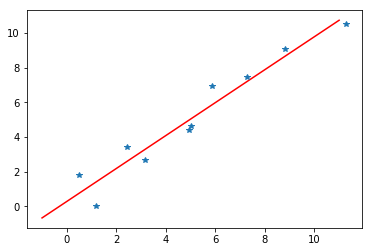

In [39]:
plt.plot(x_test, y_pred_plot, 'r')
plt.plot(x_data, y_label, '*')